In [1]:
# Program for data analysis and different ML classifiers.

In [2]:
# 2 classes (imbalanced) and 8 csv files

import numpy as np
import pandas as pd
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, log_loss, f1_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef


import import_ipynb
import data_function

# import neptune
# from neptunecontrib.monitoring.utils import pickle_and_send_artifact
# from neptunecontrib.monitoring.metrics import log_binary_classification_metrics
# from neptunecontrib.versioning.data import log_data_version

# from neptunecontrib.monitoring.metrics import *

importing Jupyter notebook from data_function.ipynb


## Data Analysis starts from here ##

In [3]:
# Reading main csv file
df = pd.read_csv("data_main.csv")
df.head()

,sample,klt,klt_jabloun,stsa,logstsa,logstsa_nest,logstsa_sap_q,weuclid,rdc,mb,wavthre,scalart,tsoukalas,unprocessed,Class
0,sp01_babble_sn5.wav,2.713719,2.697965,2.548802,2.243176,2.525531,2.973819,2.460344,1.822907,2.635221,2.988506,2.598753,3.410298,1.285175,0
1,sp02_babble_sn5.wav,3.190595,3.520302,3.264706,3.111587,2.381063,4.036488,3.165254,2.951164,3.498428,3.664080,3.252884,4.218065,2.323757,0
2,sp03_babble_sn5.wav,3.607290,3.609455,3.528847,3.182968,3.378135,3.716647,4.307754,2.806489,3.343580,3.470879,4.033968,3.735739,2.319677,0
3,sp04_babble_sn5.wav,3.196171,3.410466,2.839074,2.993245,2.781261,3.825302,2.875215,2.935166,3.211637,3.459029,3.207609,3.493634,2.338680,0
4,sp05_babble_sn5.wav,3.563157,4.196057,2.329658,2.620310,3.160787,3.000697,2.308355,2.973973,2.959249,3.822045,3.550435,4.433117,3.486025,0


In [4]:
new_df = df.copy()
new_df.head()

,sample,klt,klt_jabloun,stsa,logstsa,logstsa_nest,logstsa_sap_q,weuclid,rdc,mb,wavthre,scalart,tsoukalas,unprocessed,Class
0,sp01_babble_sn5.wav,2.713719,2.697965,2.548802,2.243176,2.525531,2.973819,2.460344,1.822907,2.635221,2.988506,2.598753,3.410298,1.285175,0
1,sp02_babble_sn5.wav,3.190595,3.520302,3.264706,3.111587,2.381063,4.036488,3.165254,2.951164,3.498428,3.664080,3.252884,4.218065,2.323757,0
2,sp03_babble_sn5.wav,3.607290,3.609455,3.528847,3.182968,3.378135,3.716647,4.307754,2.806489,3.343580,3.470879,4.033968,3.735739,2.319677,0
3,sp04_babble_sn5.wav,3.196171,3.410466,2.839074,2.993245,2.781261,3.825302,2.875215,2.935166,3.211637,3.459029,3.207609,3.493634,2.338680,0
4,sp05_babble_sn5.wav,3.563157,4.196057,2.329658,2.620310,3.160787,3.000697,2.308355,2.973973,2.959249,3.822045,3.550435,4.433117,3.486025,0


In [5]:
len(df)

240

In [6]:
new_df=new_df.drop(['sample'], axis=1)
new_df.head()

,klt,klt_jabloun,stsa,logstsa,logstsa_nest,logstsa_sap_q,weuclid,rdc,mb,wavthre,scalart,tsoukalas,unprocessed,Class
0,2.713719,2.697965,2.548802,2.243176,2.525531,2.973819,2.460344,1.822907,2.635221,2.988506,2.598753,3.410298,1.285175,0
1,3.190595,3.520302,3.264706,3.111587,2.381063,4.036488,3.165254,2.951164,3.498428,3.664080,3.252884,4.218065,2.323757,0
2,3.607290,3.609455,3.528847,3.182968,3.378135,3.716647,4.307754,2.806489,3.343580,3.470879,4.033968,3.735739,2.319677,0
3,3.196171,3.410466,2.839074,2.993245,2.781261,3.825302,2.875215,2.935166,3.211637,3.459029,3.207609,3.493634,2.338680,0
4,3.563157,4.196057,2.329658,2.620310,3.160787,3.000697,2.308355,2.973973,2.959249,3.822045,3.550435,4.433117,3.486025,0


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   klt            240 non-null    float64
 1   klt_jabloun    240 non-null    float64
 2   stsa           240 non-null    float64
 3   logstsa        240 non-null    float64
 4   logstsa_nest   240 non-null    float64
 5   logstsa_sap_q  240 non-null    float64
 6   weuclid        240 non-null    float64
 7   rdc            240 non-null    float64
 8   mb             240 non-null    float64
 9   wavthre        240 non-null    float64
 10  scalart        240 non-null    float64
 11  tsoukalas      240 non-null    float64
 12  unprocessed    240 non-null    float64
 13  Class          240 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 26.4 KB


In [8]:
new_df.describe()

,klt,klt_jabloun,stsa,logstsa,logstsa_nest,logstsa_sap_q,weuclid,rdc,mb,wavthre,scalart,tsoukalas,unprocessed,Class
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.939193,3.048408,3.032191,3.070492,3.117404,3.545930,3.024909,2.751098,3.048900,3.196608,3.152823,3.618055,2.488383,3.500000
std,0.481417,0.437907,0.482773,0.469524,0.444638,0.652196,0.468329,0.528464,0.412588,0.473989,0.488113,0.661743,0.761619,2.296076
min,1.499014,1.713024,1.228111,1.381231,1.991043,1.392984,1.549166,1.000000,1.937271,2.107916,1.688428,1.268991,1.000000,0.000000
25%,2.584437,2.759903,2.721581,2.753423,2.807433,3.091185,2.712400,2.496467,2.784563,2.845879,2.807174,3.248739,1.949640,1.750000
50%,2.923083,3.069301,3.022215,3.064395,3.113008,3.568036,3.037246,2.796194,3.038339,3.196256,3.144543,3.687056,2.491385,3.500000
75%,3.272755,3.357757,3.375505,3.434422,3.450353,3.955233,3.338112,3.096421,3.374354,3.533816,3.470298,4.036127,3.025651,5.250000
max,4.236159,4.196057,4.365898,4.163068,4.226978,5.000000,4.364962,4.068968,4.527827,4.350074,4.991149,5.000000,4.207745,7.000000


In [9]:
header = list(new_df)
header

['klt',
 'klt_jabloun',
 'stsa',
 'logstsa',
 'logstsa_nest',
 'logstsa_sap_q',
 'weuclid',
 'rdc',
 'mb',
 'wavthre',
 'scalart',
 'tsoukalas',
 'unprocessed',
 'Class']

In [10]:
target=header[-1]
target

'Class'

In [11]:
# Removing 'class' column and keeping 'speech enhancement methods' and 'unprocessed/noisy' only
header.remove('Class')
predictors=header.copy()

In [12]:
# speech enhancement methods and noisy
predictors 

['klt',
 'klt_jabloun',
 'stsa',
 'logstsa',
 'logstsa_nest',
 'logstsa_sap_q',
 'weuclid',
 'rdc',
 'mb',
 'wavthre',
 'scalart',
 'tsoukalas',
 'unprocessed']

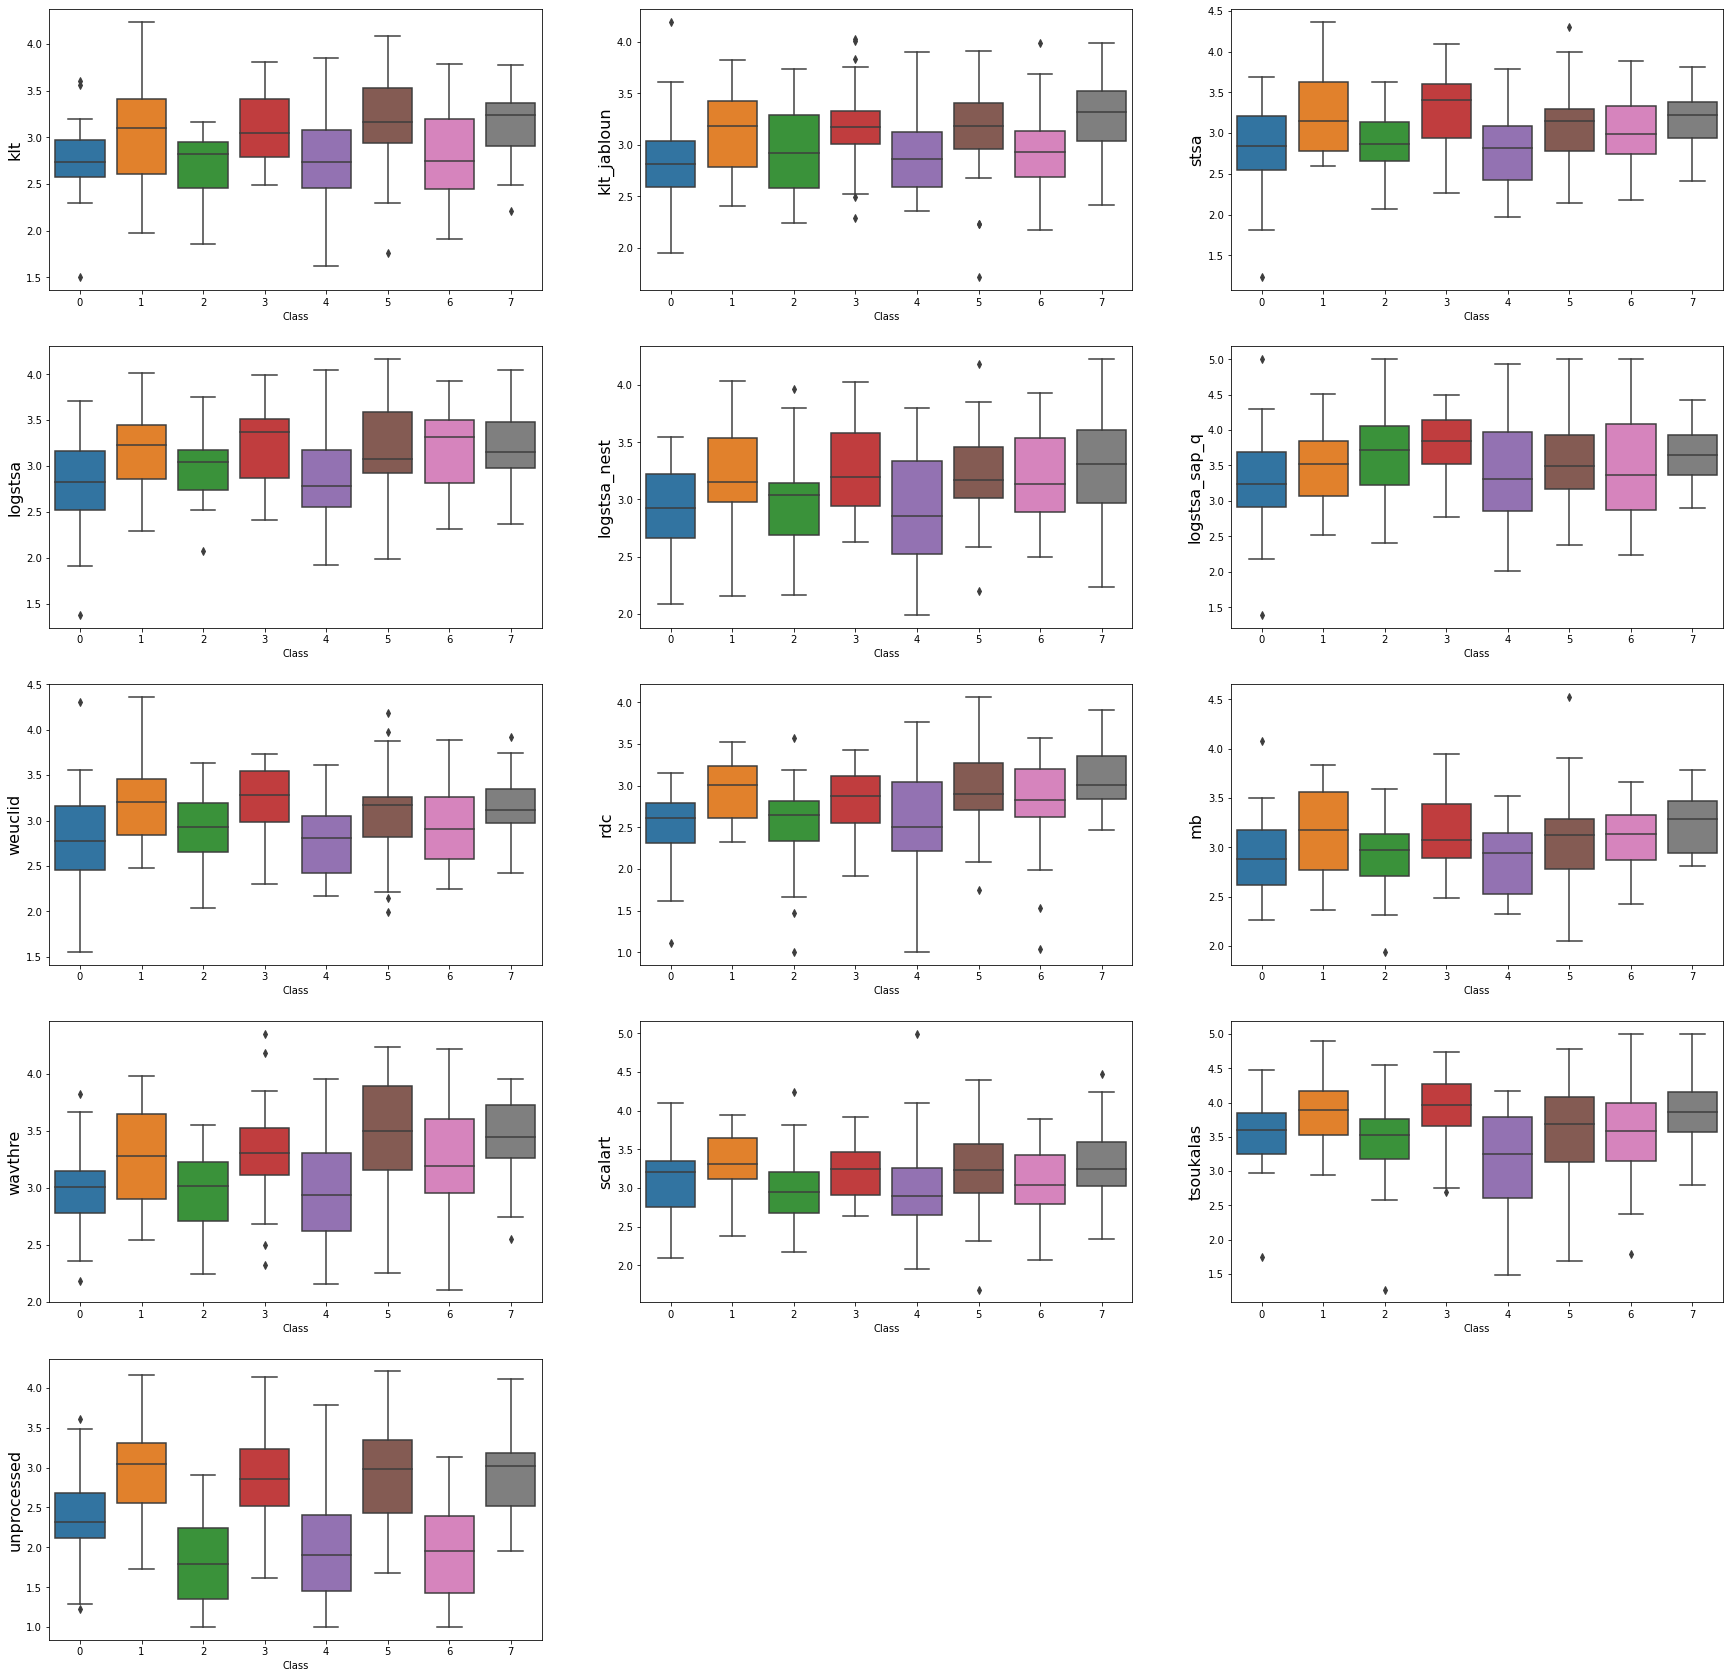

In [13]:
# Bar plot of each class with each speech enhancement methods and unprocessed/noisy   

data_function.drawBarPlot(sns,plt,predictors,target,new_df)

In [14]:
###### Bar plot of each class with delta (i.e. difference of each speech enhancement method and noisy/unprocessed) #####

In [15]:
new_df_delta=new_df
header=list(new_df_delta)
target=header[-1]
header.remove('Class')
predictors=header.copy()

In [16]:
# Delta = difference of each speech enhancement method (klt, klt_jabloun,.....) with unprocessed (noisy) 
i=0
predictors[i]
len(predictors)
k=0
for i in range(1,len(predictors)+1):
    new_df_delta[predictors[k]]=new_df[predictors[k]]-new_df['unprocessed']
    k=k+1
    if k == len(predictors):
        break

In [17]:
new_df_delta.head()
header = list(new_df_delta)
target=header[-1]

In [18]:
# Saving delta values in csv file
# new_df_delta.to_csv('delta.csv')

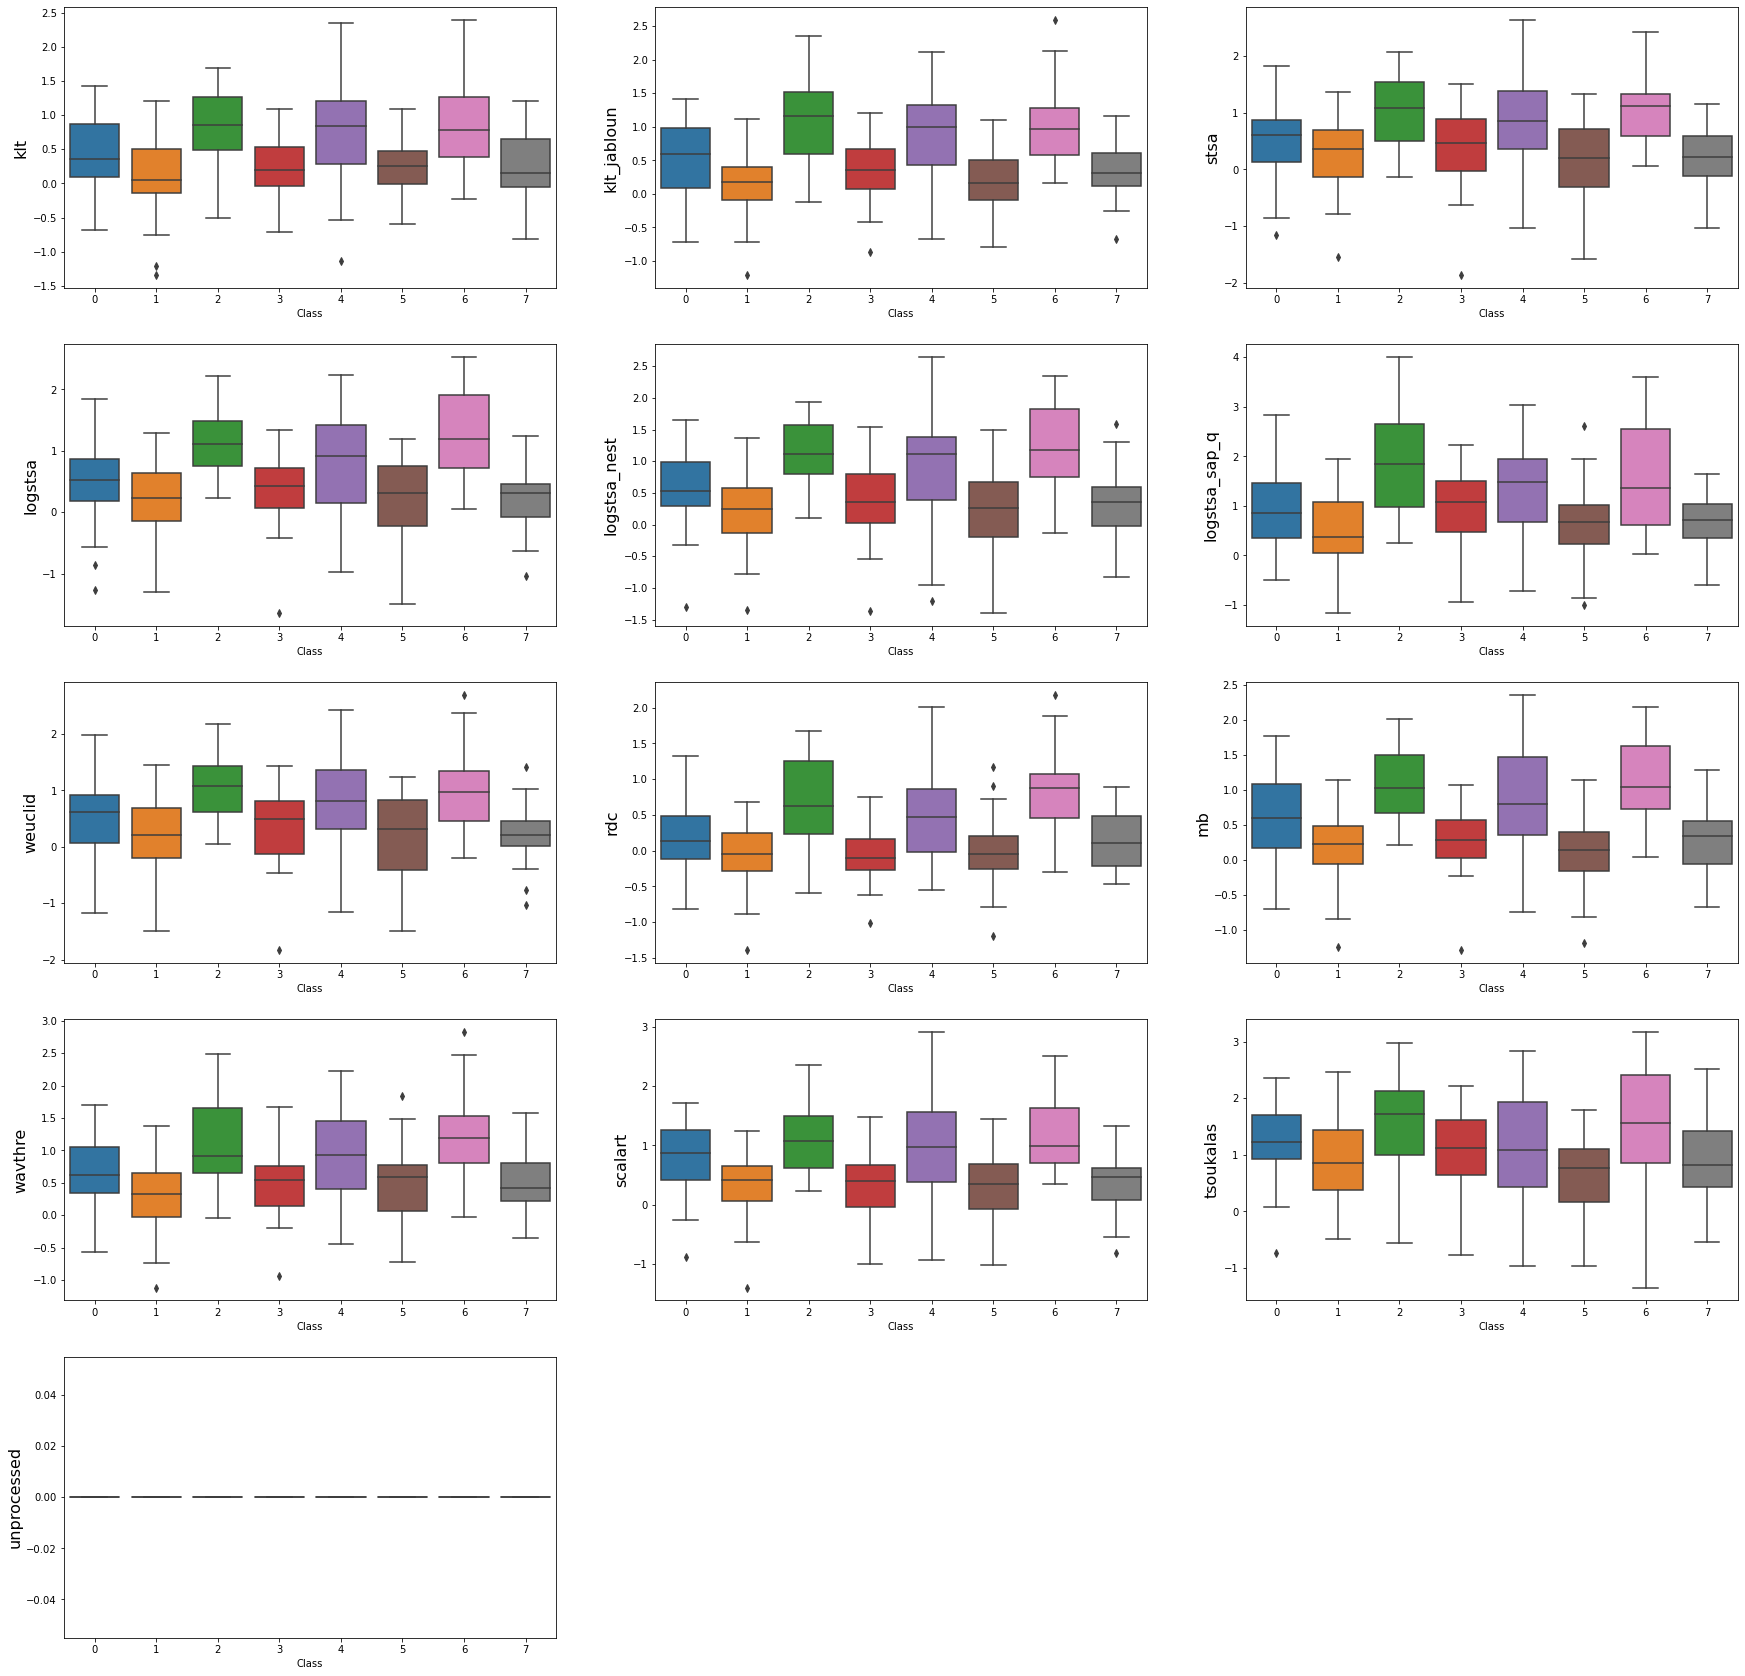

In [19]:
# Bar plot of each class with delta (i.e. difference of each speech enhancement method and noisy/unprocessed)  

data_function.drawBarPlot(sns,plt,predictors,target,new_df_delta)

In [20]:
################ Heatmap for Correlation of columns ################

In [21]:
df_heatmap=df.drop(['sample'], axis=1)  # Needed column
# df_heatmap.head()

In [22]:
########################### Histogram Plot #################################

In [23]:
new_df=df_heatmap  # Original dataset
new_df.head()

,klt,klt_jabloun,stsa,logstsa,logstsa_nest,logstsa_sap_q,weuclid,rdc,mb,wavthre,scalart,tsoukalas,unprocessed,Class
0,2.713719,2.697965,2.548802,2.243176,2.525531,2.973819,2.460344,1.822907,2.635221,2.988506,2.598753,3.410298,1.285175,0
1,3.190595,3.520302,3.264706,3.111587,2.381063,4.036488,3.165254,2.951164,3.498428,3.664080,3.252884,4.218065,2.323757,0
2,3.607290,3.609455,3.528847,3.182968,3.378135,3.716647,4.307754,2.806489,3.343580,3.470879,4.033968,3.735739,2.319677,0
3,3.196171,3.410466,2.839074,2.993245,2.781261,3.825302,2.875215,2.935166,3.211637,3.459029,3.207609,3.493634,2.338680,0
4,3.563157,4.196057,2.329658,2.620310,3.160787,3.000697,2.308355,2.973973,2.959249,3.822045,3.550435,4.433117,3.486025,0


In [24]:
# Normalizing the original dataset to plot Histogram to see data distribution
df_norm=data_function.getNormalization(new_df)
df_norm.head()

,klt,klt_jabloun,stsa,logstsa,logstsa_nest,logstsa_sap_q,weuclid,rdc,mb,wavthre,scalart,tsoukalas,unprocessed,Class
0,-0.468355,-0.800267,-1.001276,-1.762030,-1.331134,-0.877207,-1.205490,-1.756394,-1.002643,-0.439044,-1.135126,-0.313954,-1.579803,0
1,0.522214,1.077612,0.481624,0.087525,-1.656045,0.752163,0.299671,0.378581,1.089534,0.986251,0.204996,0.906711,-0.216152,0
2,1.387774,1.281201,1.028757,0.239553,0.586388,0.261757,2.739198,0.104816,0.714225,0.578644,1.805207,0.177839,-0.221509,0
3,0.533796,0.826792,-0.400016,-0.164522,-0.755993,0.428356,-0.319635,0.348308,0.394431,0.553644,0.112241,-0.188020,-0.196559,0
4,1.296101,2.620759,-1.455204,-0.958804,0.097568,-0.835996,-1.530025,0.421742,-0.217288,1.319518,0.814590,1.231689,1.309897,0


Histogram plot of each algorithm:


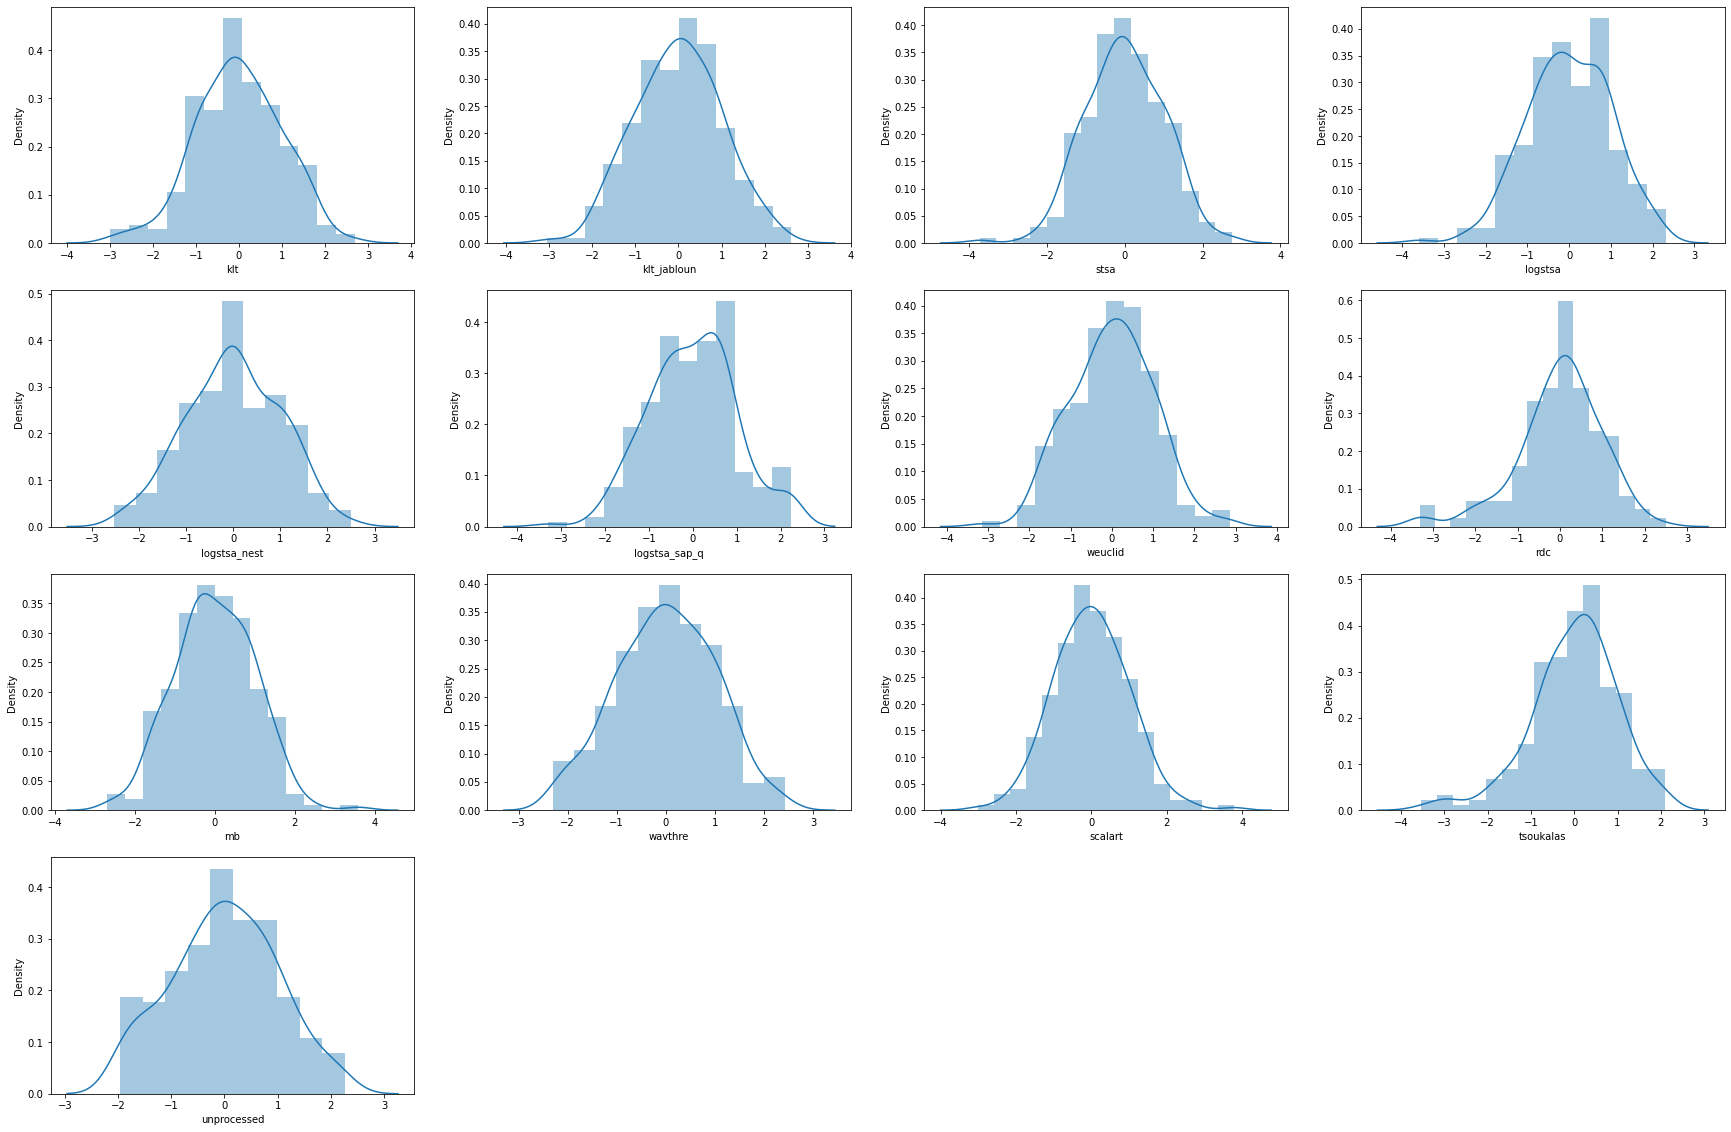

In [25]:
# Data Distribution

print('Histogram plot of each algorithm:')
data_function.drawHistogramPlot(sns,plt,df_norm,predictors)   

In [26]:
############################### Data Analysis done ###########################################

## Classification Starts from here ##

In [27]:
# Initialization
Number_of_Samples = 30 
Results = []

In [28]:
# Reading main csv file
df = pd.read_csv("data_main.csv")

Original dataset shape Counter({0: 30, 1: 30})
New dataset shape Counter({1: 24, 0: 24})
################# XGBoost ########################
[00:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
G-Mean: 0.0
Matthews correlation coefficient: 0.0
Algorithm:XGBoost , Accuracy:0.5
Confusion Matrix:
 [[6 0]
 [6 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[00:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/s

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[00:49:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:49:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

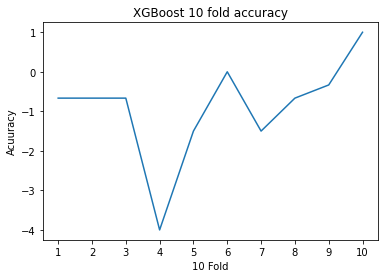

############### Random Forest #####################
G-Mean: 0.816496580927726
Matthews correlation coefficient: 0.7071067811865476
Algorithm:Random Forest , Accuracy:0.8333333333333334
Confusion Matrix:
 [[6 0]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



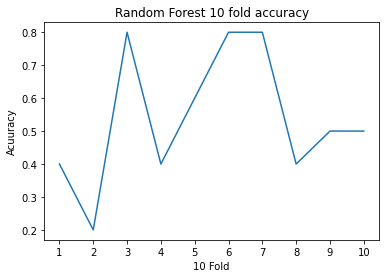

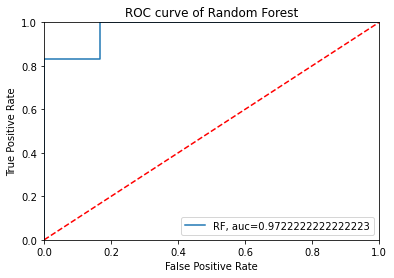

############### Decision Tree #######################
G-Mean: 0.9128709291752769
Matthews correlation coefficient: 0.8451542547285166
Algorithm:Decision Tree , Accuracy:0.9166666666666666
Confusion Matrix:
 [[6 0]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



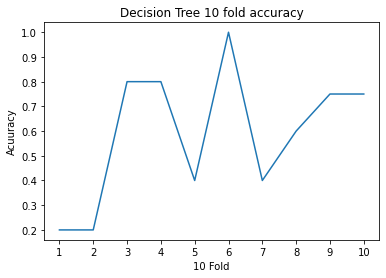

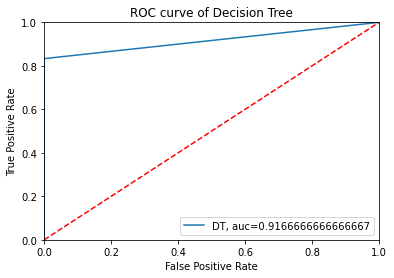

############### Logistic Regression ###################
G-Mean: 0.6454972243679028
Matthews correlation coefficient: 0.3535533905932738
Algorithm:Logistic Regression , Accuracy:0.6666666666666666
Confusion Matrix:
 [[5 1]
 [3 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



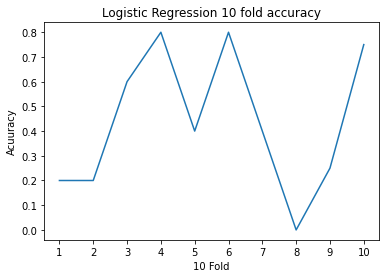

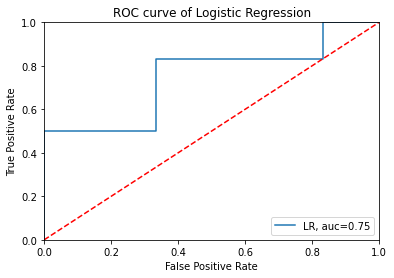

###################### SVM #############################
G-Mean: 0.7453559924999299
Matthews correlation coefficient: 0.50709255283711
Algorithm:SVM , Accuracy:0.75
Confusion Matrix:
 [[4 2]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.71      0.83      0.77         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



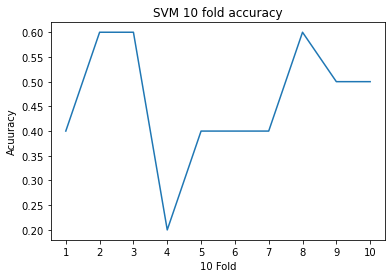

###################### KNN ###############################
G-Mean: 0.8333333333333334
Matthews correlation coefficient: 0.6666666666666666
Algorithm:KNN , Accuracy:0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



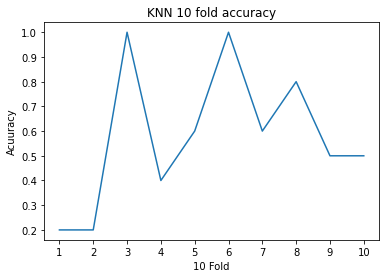

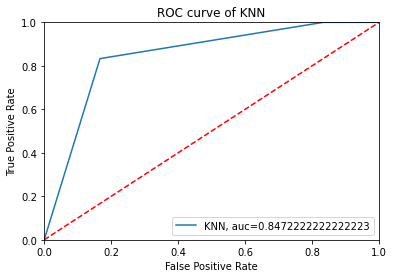

###################### Linear SVC #########################
G-Mean: 0.5773502691896257
Matthews correlation coefficient: 0.1690308509457033
Algorithm:Linear SVC , Accuracy:0.5833333333333334
Confusion Matrix:
 [[4 2]
 [3 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.60      0.50      0.55         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12



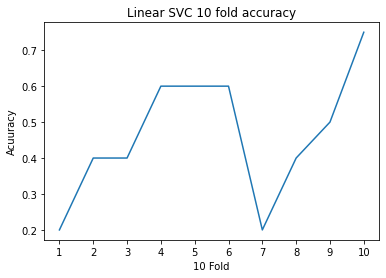

In [29]:
# Babble 5dB dataframe i.e. babble_sn5 = class 0 and 30 samples from remaining = class 1

data=data_function.getDifferentDataFrame(df,'babble_sn5')
x_train, y_train, x_test, y_test=data_function.getTrainTestData(data,Number_of_Samples,4,4)
data_function.Report(x_train, y_train, x_test, y_test)

Original dataset shape Counter({1: 30, 0: 30})
New dataset shape Counter({0: 24, 1: 24})
################# XGBoost ########################
[00:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
G-Mean: 0.0
Matthews correlation coefficient: 0.0
Algorithm:XGBoost , Accuracy:0.5
Confusion Matrix:
 [[6 0]
 [6 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[00:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/s

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[00:50:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

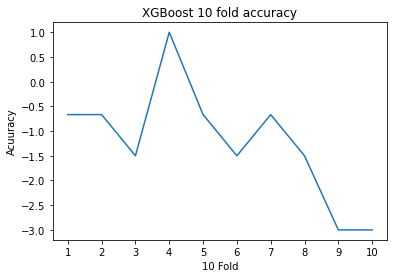

############### Random Forest #####################
G-Mean: 0.6666666666666666
Matthews correlation coefficient: 0.3333333333333333
Algorithm:Random Forest , Accuracy:0.6666666666666666
Confusion Matrix:
 [[4 2]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12



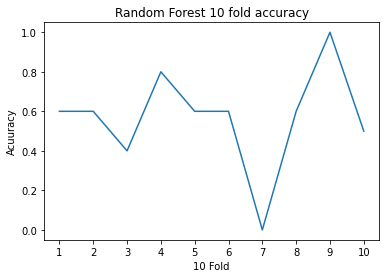

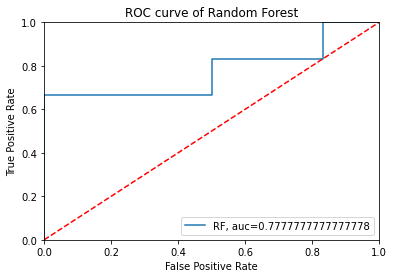

############### Decision Tree #######################
G-Mean: 0.8333333333333334
Matthews correlation coefficient: 0.6666666666666666
Algorithm:Decision Tree , Accuracy:0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



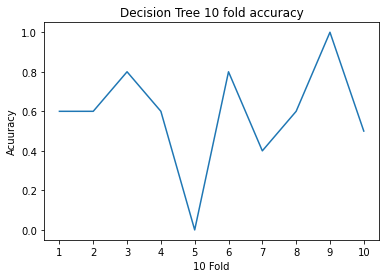

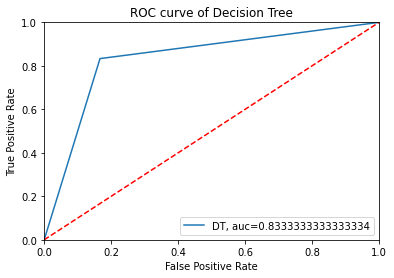

############### Logistic Regression ###################
G-Mean: 0.6454972243679028
Matthews correlation coefficient: 0.3535533905932738
Algorithm:Logistic Regression , Accuracy:0.6666666666666666
Confusion Matrix:
 [[5 1]
 [3 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



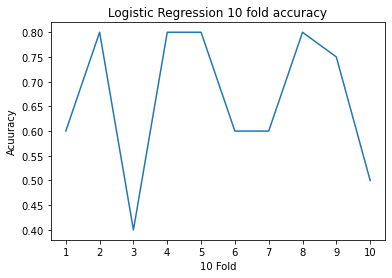

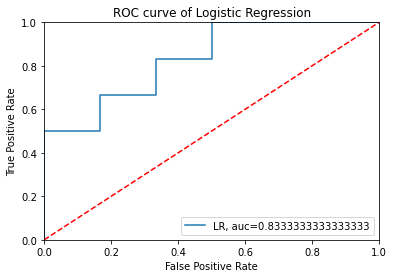

###################### SVM #############################
G-Mean: 0.6454972243679028
Matthews correlation coefficient: 0.3535533905932738
Algorithm:SVM , Accuracy:0.6666666666666666
Confusion Matrix:
 [[3 3]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.62      0.83      0.71         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



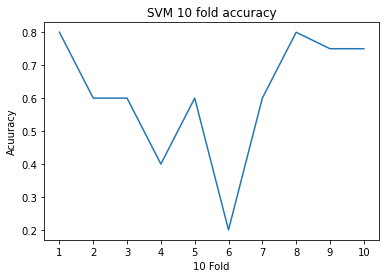

###################### KNN ###############################
G-Mean: 0.4714045207910317
Matthews correlation coefficient: 0.0
Algorithm:KNN , Accuracy:0.5
Confusion Matrix:
 [[4 2]
 [4 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.33      0.40         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12



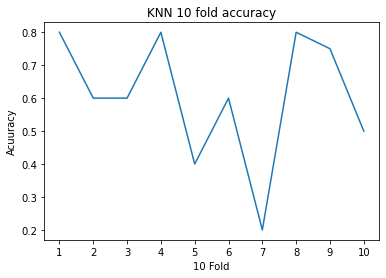

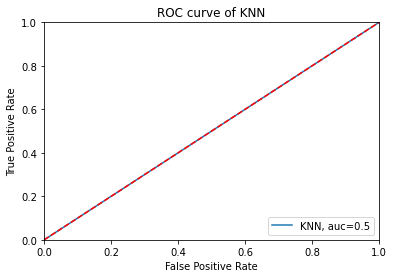

###################### Linear SVC #########################
G-Mean: 0.5773502691896257
Matthews correlation coefficient: 0.1690308509457033
Algorithm:Linear SVC , Accuracy:0.5833333333333334
Confusion Matrix:
 [[4 2]
 [3 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.60      0.50      0.55         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12



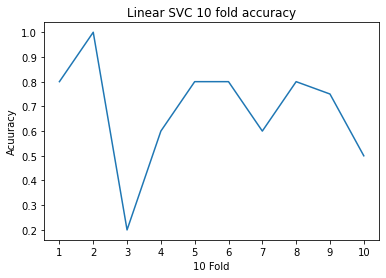

In [30]:
# Babble 10dB dataframe i.e. babble_sn10 = class 0 and 30 samples from remaining = class 1

data=data_function.getDifferentDataFrame(df,'babble_sn10')
x_train, y_train, x_test, y_test=data_function.getTrainTestData(data,Number_of_Samples,3,3)
data_function.Report(x_train, y_train, x_test, y_test)

Original dataset shape Counter({0: 30, 1: 30})
New dataset shape Counter({1: 24, 0: 24})
################# XGBoost ########################
[00:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
G-Mean: 0.4714045207910317
Matthews correlation coefficient: 0.0
Algorithm:XGBoost , Accuracy:0.5
Confusion Matrix:
 [[4 2]
 [4 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.33      0.40         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12

[00:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

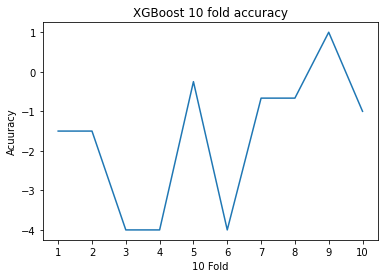

############### Random Forest #####################
G-Mean: 0.6454972243679028
Matthews correlation coefficient: 0.3535533905932738
Algorithm:Random Forest , Accuracy:0.6666666666666666
Confusion Matrix:
 [[5 1]
 [3 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



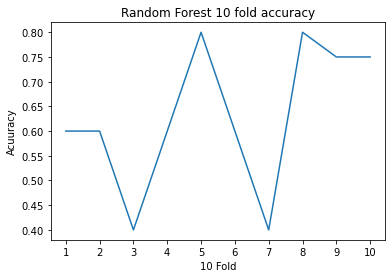

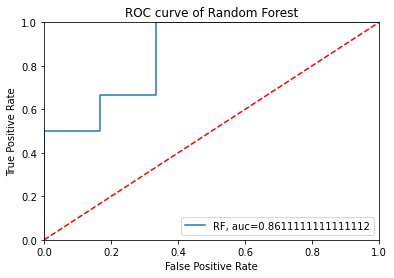

############### Decision Tree #######################
G-Mean: 0.6666666666666666
Matthews correlation coefficient: 0.3333333333333333
Algorithm:Decision Tree , Accuracy:0.6666666666666666
Confusion Matrix:
 [[4 2]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12



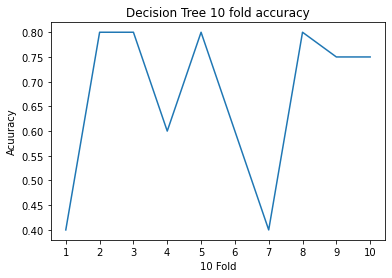

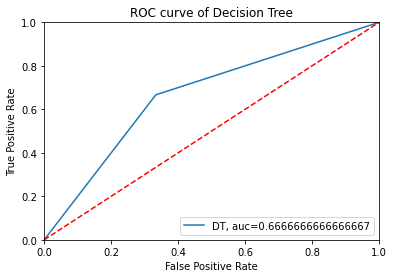

############### Logistic Regression ###################
G-Mean: 0.816496580927726
Matthews correlation coefficient: 0.7071067811865476
Algorithm:Logistic Regression , Accuracy:0.8333333333333334
Confusion Matrix:
 [[4 2]
 [0 6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



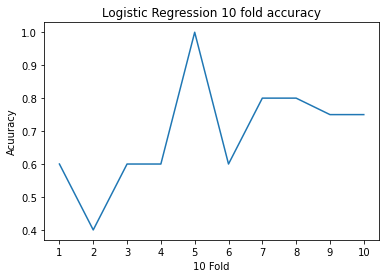

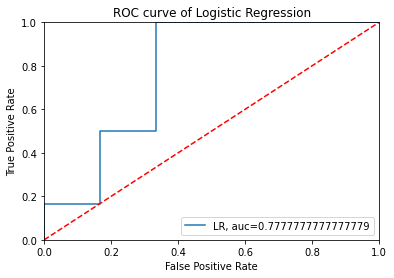

###################### SVM #############################
G-Mean: 0.4714045207910317
Matthews correlation coefficient: 0.0
Algorithm:SVM , Accuracy:0.5
Confusion Matrix:
 [[2 4]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.50      0.67      0.57         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12



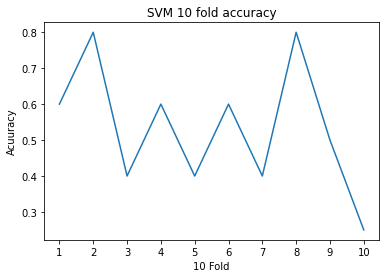

###################### KNN ###############################
G-Mean: 0.6666666666666666
Matthews correlation coefficient: 0.3333333333333333
Algorithm:KNN , Accuracy:0.6666666666666666
Confusion Matrix:
 [[4 2]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12



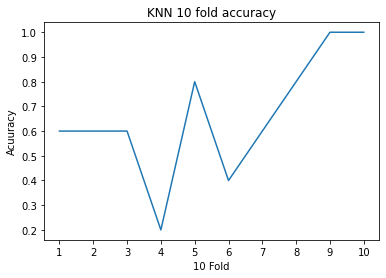

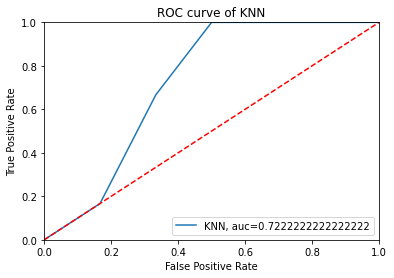

###################### Linear SVC #########################
G-Mean: 0.816496580927726
Matthews correlation coefficient: 0.7071067811865476
Algorithm:Linear SVC , Accuracy:0.8333333333333334
Confusion Matrix:
 [[4 2]
 [0 6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



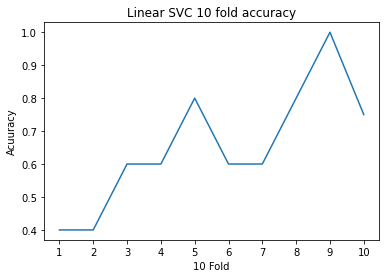

In [31]:
# Car 5dB dataframe i.e. car_sn5 = class 0 and 30 samples from remaining = class 1

data=data_function.getDifferentDataFrame(df,'car_sn5')
x_train, y_train, x_test, y_test=data_function.getTrainTestData(data,Number_of_Samples,0,1)
data_function.Report(x_train, y_train, x_test, y_test)

Original dataset shape Counter({0: 30, 1: 30})
New dataset shape Counter({0: 24, 1: 24})
################# XGBoost ########################
[00:52:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
G-Mean: 0.7071067811865476
Matthews correlation coefficient: 0.5773502691896257
Algorithm:XGBoost , Accuracy:0.75
Confusion Matrix:
 [[3 3]
 [0 6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.67      1.00      0.80         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

[00:52:37] WARNING: C:/Users/Administrator/workspac

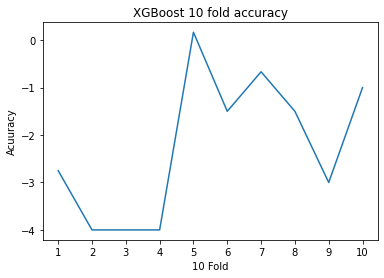

############### Random Forest #####################
G-Mean: 0.7071067811865476
Matthews correlation coefficient: 0.5773502691896257
Algorithm:Random Forest , Accuracy:0.75
Confusion Matrix:
 [[3 3]
 [0 6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.67      1.00      0.80         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12



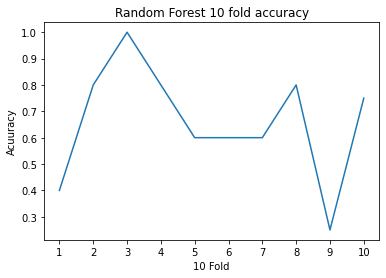

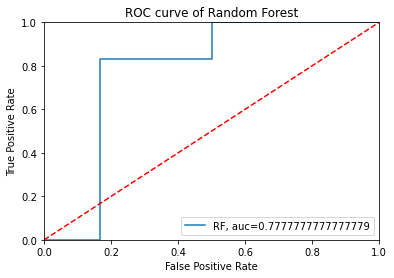

############### Decision Tree #######################
G-Mean: 0.8333333333333334
Matthews correlation coefficient: 0.6666666666666666
Algorithm:Decision Tree , Accuracy:0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



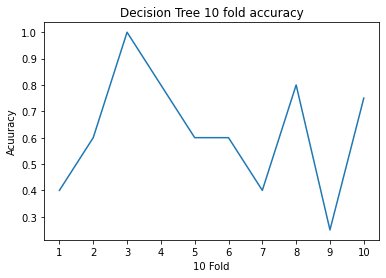

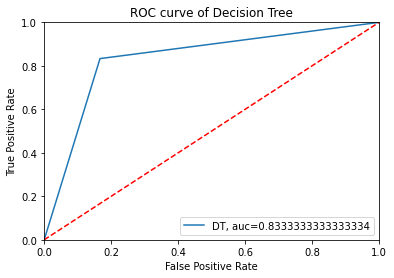

############### Logistic Regression ###################
G-Mean: 0.7453559924999299
Matthews correlation coefficient: 0.50709255283711
Algorithm:Logistic Regression , Accuracy:0.75
Confusion Matrix:
 [[4 2]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.71      0.83      0.77         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



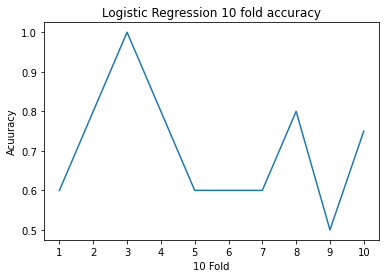

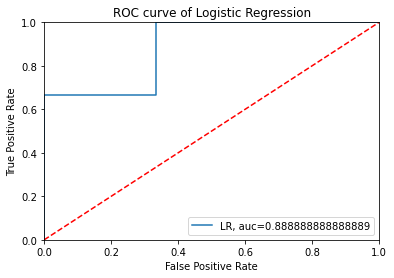

###################### SVM #############################
G-Mean: 0.6666666666666666
Matthews correlation coefficient: 0.3333333333333333
Algorithm:SVM , Accuracy:0.6666666666666666
Confusion Matrix:
 [[4 2]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12



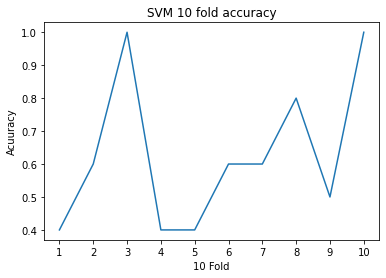

###################### KNN ###############################
G-Mean: 0.6666666666666666
Matthews correlation coefficient: 0.3333333333333333
Algorithm:KNN , Accuracy:0.6666666666666666
Confusion Matrix:
 [[4 2]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12



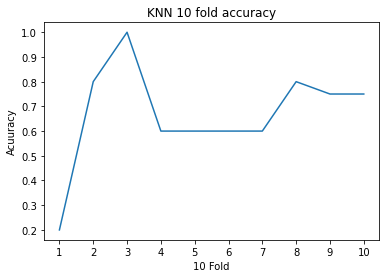

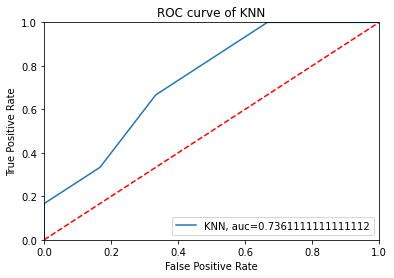

###################### Linear SVC #########################
G-Mean: 0.7453559924999299
Matthews correlation coefficient: 0.50709255283711
Algorithm:Linear SVC , Accuracy:0.75
Confusion Matrix:
 [[4 2]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.71      0.83      0.77         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



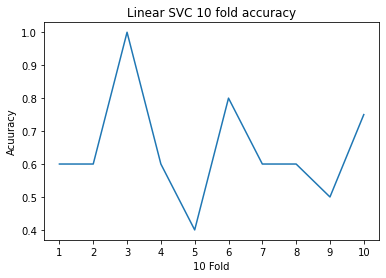

In [32]:
# Car 10dB dataframe i.e. car_sn10 = class 0 and 30 samples from remaining = class 1

data=data_function.getDifferentDataFrame(df,'car_sn10')
x_train, y_train, x_test, y_test=data_function.getTrainTestData(data,Number_of_Samples,6,6)
data_function.Report(x_train, y_train, x_test, y_test)

Original dataset shape Counter({0: 30, 1: 30})
New dataset shape Counter({1: 24, 0: 24})
################# XGBoost ########################
[00:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
G-Mean: 0.8333333333333334
Matthews correlation coefficient: 0.6666666666666666
Algorithm:XGBoost , Accuracy:0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12

[00:53:46] WARNING: C:/Users/Administ

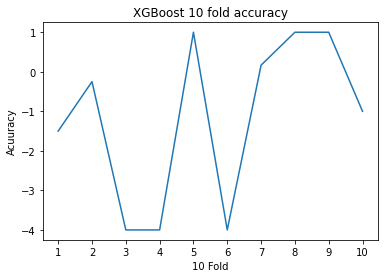

############### Random Forest #####################
G-Mean: 0.7453559924999299
Matthews correlation coefficient: 0.50709255283711
Algorithm:Random Forest , Accuracy:0.75
Confusion Matrix:
 [[5 1]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



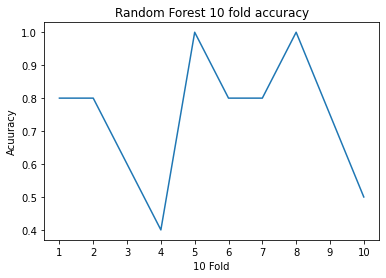

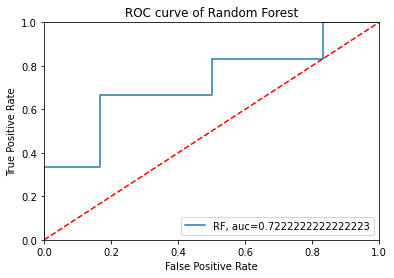

############### Decision Tree #######################
G-Mean: 0.9128709291752769
Matthews correlation coefficient: 0.8451542547285166
Algorithm:Decision Tree , Accuracy:0.9166666666666666
Confusion Matrix:
 [[5 1]
 [0 6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



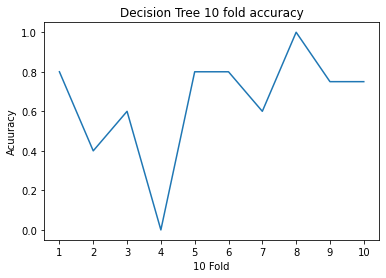

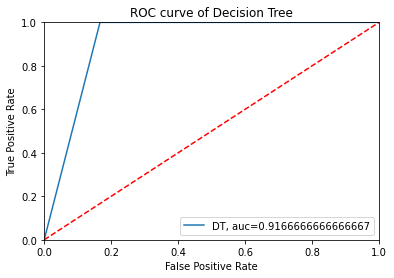

############### Logistic Regression ###################
G-Mean: 0.7453559924999299
Matthews correlation coefficient: 0.50709255283711
Algorithm:Logistic Regression , Accuracy:0.75
Confusion Matrix:
 [[5 1]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



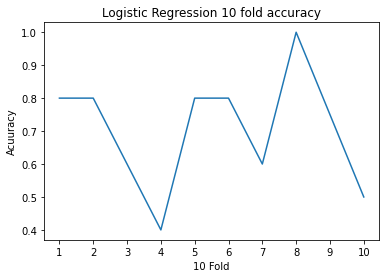

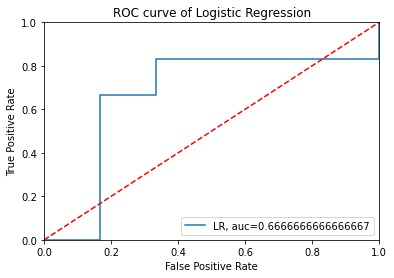

###################### SVM #############################
G-Mean: 0.6454972243679028
Matthews correlation coefficient: 0.3535533905932738
Algorithm:SVM , Accuracy:0.6666666666666666
Confusion Matrix:
 [[3 3]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.62      0.83      0.71         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



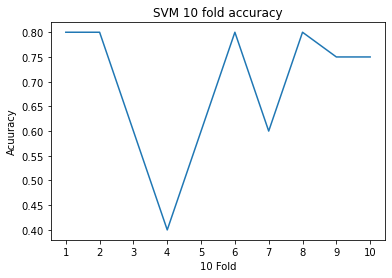

###################### KNN ###############################
G-Mean: 0.8333333333333334
Matthews correlation coefficient: 0.6666666666666666
Algorithm:KNN , Accuracy:0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



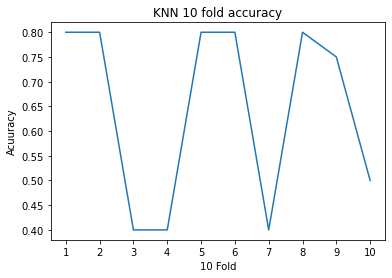

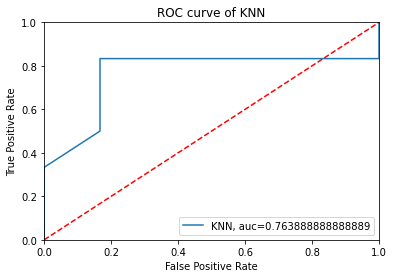

###################### Linear SVC #########################
G-Mean: 0.7453559924999299
Matthews correlation coefficient: 0.50709255283711
Algorithm:Linear SVC , Accuracy:0.75
Confusion Matrix:
 [[5 1]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



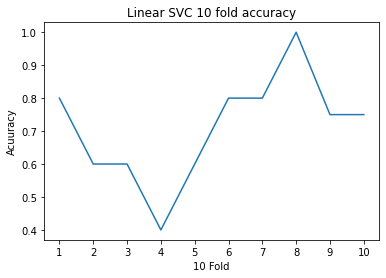

In [33]:
# Street 5dB dataframe i.e. street_sn5 = class 0 and 30 samples from remaining = class 1

data=data_function.getDifferentDataFrame(df,'street_sn5')
x_train, y_train, x_test, y_test=data_function.getTrainTestData(data,Number_of_Samples,0,1)
data_function.Report(x_train, y_train, x_test, y_test)

Original dataset shape Counter({0: 30, 1: 30})
New dataset shape Counter({0: 24, 1: 24})
################# XGBoost ########################
[00:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
G-Mean: 0.0
Matthews correlation coefficient: 0.0
Algorithm:XGBoost , Accuracy:0.5
Confusion Matrix:
 [[6 0]
 [6 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[00:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/s

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[00:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:54:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

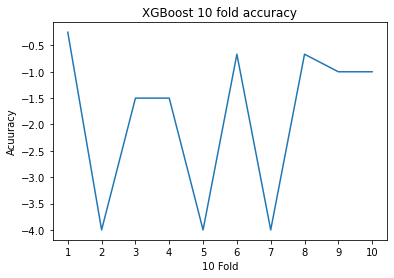

############### Random Forest #####################
G-Mean: 0.5270462766947298
Matthews correlation coefficient: 0.19245008972987526
Algorithm:Random Forest , Accuracy:0.5833333333333334
Confusion Matrix:
 [[2 4]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.56      0.83      0.67         6

    accuracy                           0.58        12
   macro avg       0.61      0.58      0.56        12
weighted avg       0.61      0.58      0.56        12



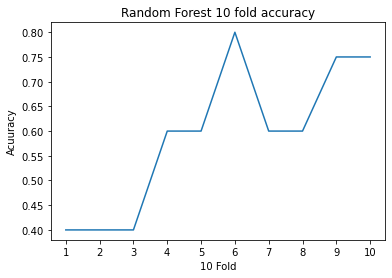

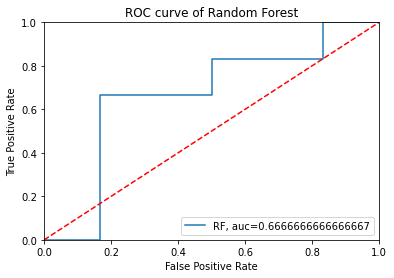

############### Decision Tree #######################
G-Mean: 0.4714045207910317
Matthews correlation coefficient: 0.0
Algorithm:Decision Tree , Accuracy:0.5
Confusion Matrix:
 [[4 2]
 [4 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.33      0.40         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12



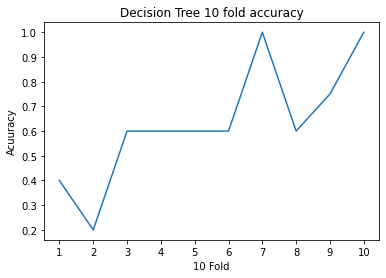

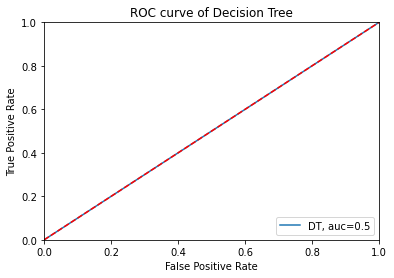

############### Logistic Regression ###################
G-Mean: 0.7453559924999299
Matthews correlation coefficient: 0.50709255283711
Algorithm:Logistic Regression , Accuracy:0.75
Confusion Matrix:
 [[5 1]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



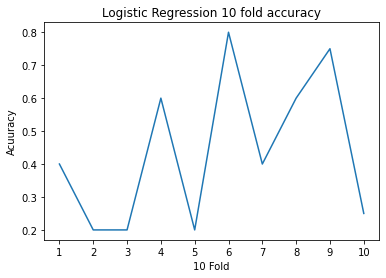

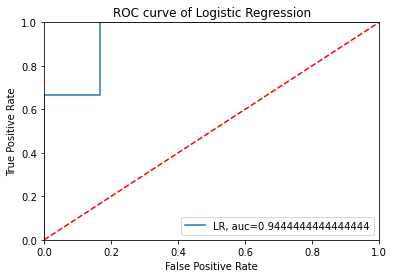

###################### SVM #############################
G-Mean: 0.5270462766947298
Matthews correlation coefficient: 0.19245008972987526
Algorithm:SVM , Accuracy:0.5833333333333334
Confusion Matrix:
 [[2 4]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.56      0.83      0.67         6

    accuracy                           0.58        12
   macro avg       0.61      0.58      0.56        12
weighted avg       0.61      0.58      0.56        12



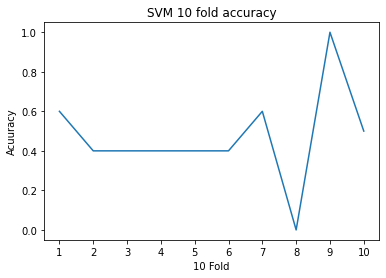

###################### KNN ###############################
G-Mean: 0.37267799624996495
Matthews correlation coefficient: 0.0
Algorithm:KNN , Accuracy:0.5
Confusion Matrix:
 [[1 5]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.50      0.83      0.62         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.44        12
weighted avg       0.50      0.50      0.44        12



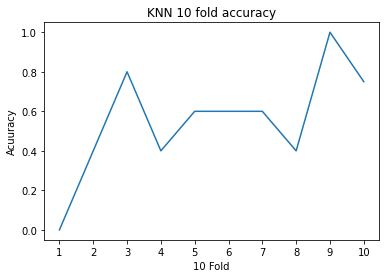

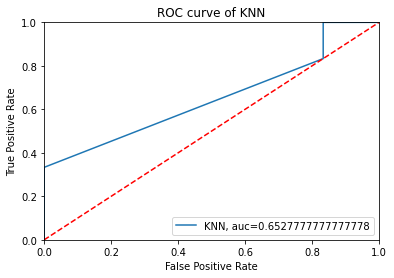

###################### Linear SVC #########################
G-Mean: 0.8333333333333334
Matthews correlation coefficient: 0.6666666666666666
Algorithm:Linear SVC , Accuracy:0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



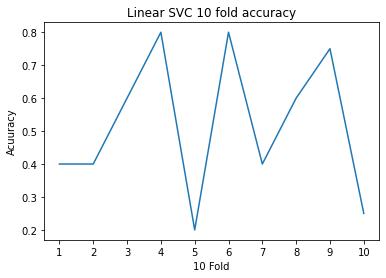

In [34]:
# Street 10dB dataframe i.e. street_sn10 = class 0 and 30 samples from remaining = class 1

data=data_function.getDifferentDataFrame(df,'street_sn10')
x_train, y_train, x_test, y_test=data_function.getTrainTestData(data,Number_of_Samples,0,0)
data_function.Report(x_train, y_train, x_test, y_test)

Original dataset shape Counter({0: 30, 1: 30})
New dataset shape Counter({1: 24, 0: 24})
################# XGBoost ########################
[00:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
G-Mean: 0.6454972243679028
Matthews correlation coefficient: 0.3535533905932738
Algorithm:XGBoost , Accuracy:0.6666666666666666
Confusion Matrix:
 [[3 3]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.62      0.83      0.71         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12

[00:55:52] WARNING: C:/Users/Administ

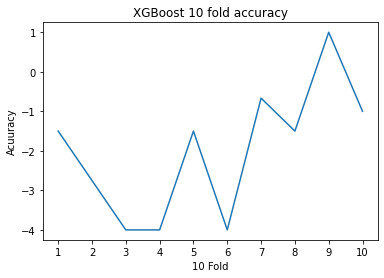

############### Random Forest #####################
G-Mean: 0.6666666666666666
Matthews correlation coefficient: 0.3333333333333333
Algorithm:Random Forest , Accuracy:0.6666666666666666
Confusion Matrix:
 [[4 2]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12



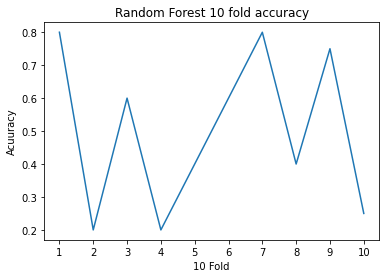

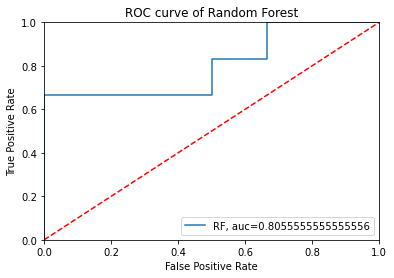

############### Decision Tree #######################
G-Mean: 0.7071067811865476
Matthews correlation coefficient: 0.5773502691896257
Algorithm:Decision Tree , Accuracy:0.75
Confusion Matrix:
 [[3 3]
 [0 6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.67      1.00      0.80         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12



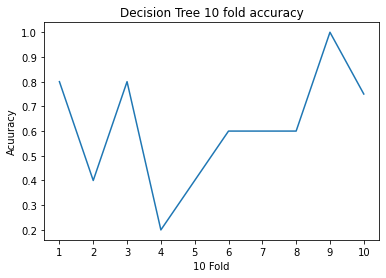

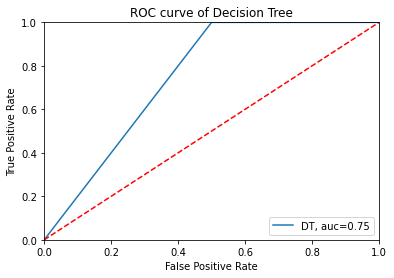

############### Logistic Regression ###################
G-Mean: 0.8333333333333334
Matthews correlation coefficient: 0.6666666666666666
Algorithm:Logistic Regression , Accuracy:0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



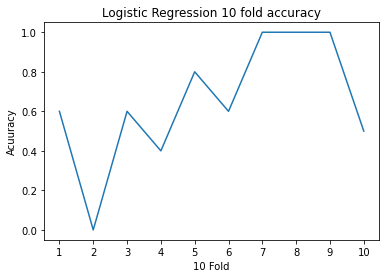

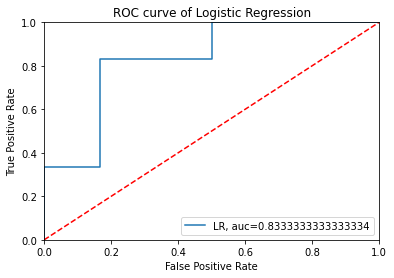

###################### SVM #############################
G-Mean: 0.6454972243679028
Matthews correlation coefficient: 0.3535533905932738
Algorithm:SVM , Accuracy:0.6666666666666666
Confusion Matrix:
 [[5 1]
 [3 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



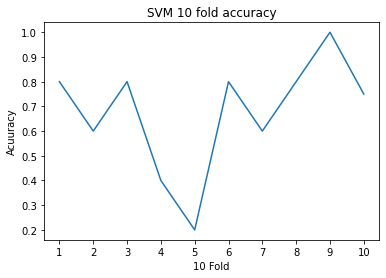

###################### KNN ###############################
G-Mean: 0.4714045207910317
Matthews correlation coefficient: 0.0
Algorithm:KNN , Accuracy:0.5
Confusion Matrix:
 [[2 4]
 [2 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.50      0.67      0.57         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12



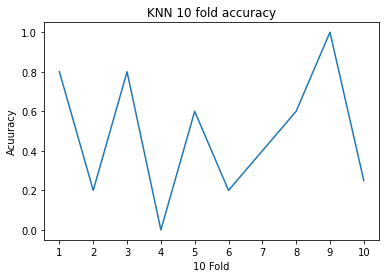

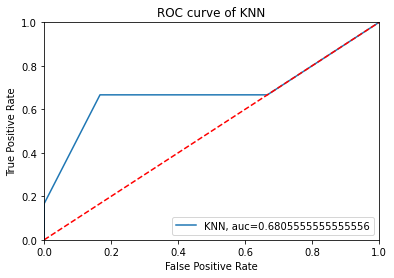

###################### Linear SVC #########################
G-Mean: 0.8333333333333334
Matthews correlation coefficient: 0.6666666666666666
Algorithm:Linear SVC , Accuracy:0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



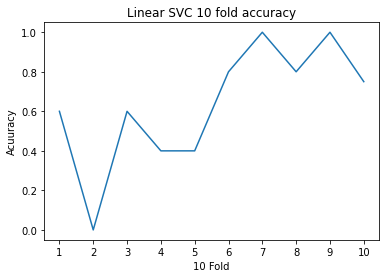

In [35]:
# Train 5dB dataframe i.e. train_sn5 = class 0 and 30 samples from remaining = class 1

data=data_function.getDifferentDataFrame(df,'train_sn5')
x_train, y_train, x_test, y_test=data_function.getTrainTestData(data,Number_of_Samples,0,1)
data_function.Report(x_train, y_train, x_test, y_test)

Original dataset shape Counter({1: 30, 0: 30})
New dataset shape Counter({0: 24, 1: 24})
################# XGBoost ########################
[00:56:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
G-Mean: 0.0
Matthews correlation coefficient: 0.0
Algorithm:XGBoost , Accuracy:0.5
Confusion Matrix:
 [[6 0]
 [6 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[00:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/s

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[00:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

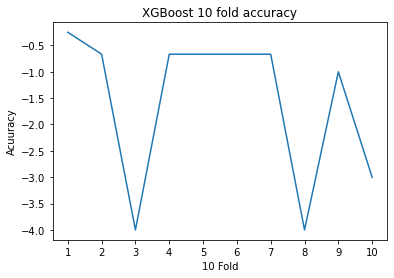

############### Random Forest #####################
G-Mean: 0.408248290463863
Matthews correlation coefficient: -0.1690308509457033
Algorithm:Random Forest , Accuracy:0.4166666666666667
Confusion Matrix:
 [[3 3]
 [4 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.40      0.33      0.36         6

    accuracy                           0.42        12
   macro avg       0.41      0.42      0.41        12
weighted avg       0.41      0.42      0.41        12



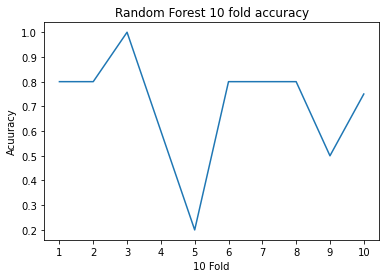

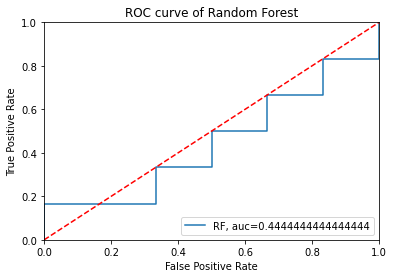

############### Decision Tree #######################
G-Mean: 0.7071067811865476
Matthews correlation coefficient: 0.5773502691896257
Algorithm:Decision Tree , Accuracy:0.75
Confusion Matrix:
 [[6 0]
 [3 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12



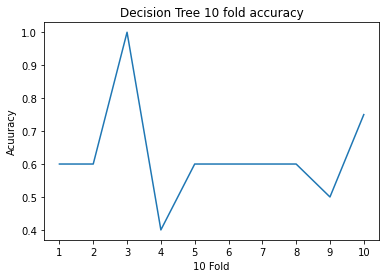

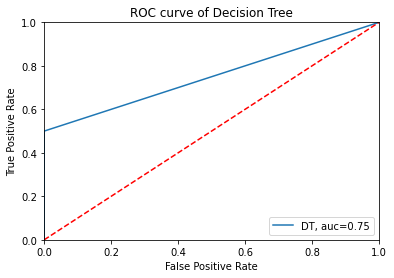

############### Logistic Regression ###################
G-Mean: 0.4714045207910317
Matthews correlation coefficient: 0.0
Algorithm:Logistic Regression , Accuracy:0.5
Confusion Matrix:
 [[4 2]
 [4 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.33      0.40         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12



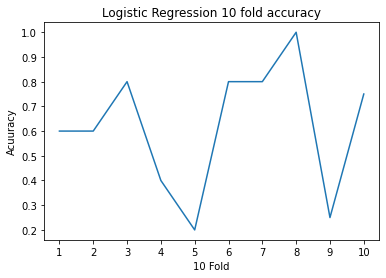

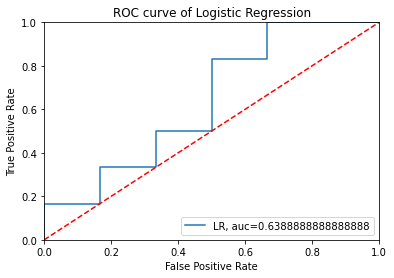

###################### SVM #############################
G-Mean: 0.6454972243679028
Matthews correlation coefficient: 0.3535533905932738
Algorithm:SVM , Accuracy:0.6666666666666666
Confusion Matrix:
 [[3 3]
 [1 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.62      0.83      0.71         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



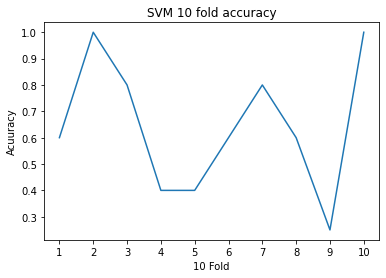

###################### KNN ###############################
G-Mean: 0.3333333333333333
Matthews correlation coefficient: -0.19245008972987526
Algorithm:KNN , Accuracy:0.4166666666666667
Confusion Matrix:
 [[4 2]
 [5 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.33      0.17      0.22         6

    accuracy                           0.42        12
   macro avg       0.39      0.42      0.38        12
weighted avg       0.39      0.42      0.38        12



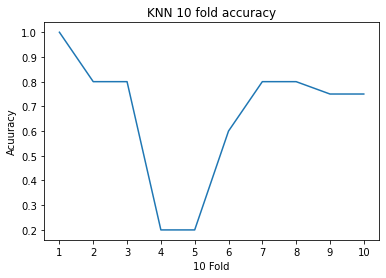

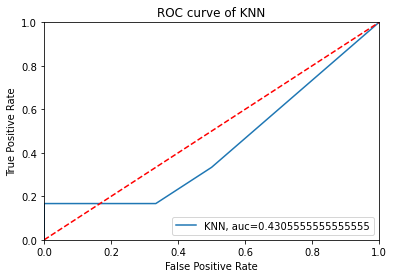

###################### Linear SVC #########################
G-Mean: 0.5773502691896257
Matthews correlation coefficient: 0.1690308509457033
Algorithm:Linear SVC , Accuracy:0.5833333333333334
Confusion Matrix:
 [[4 2]
 [3 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.60      0.50      0.55         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12



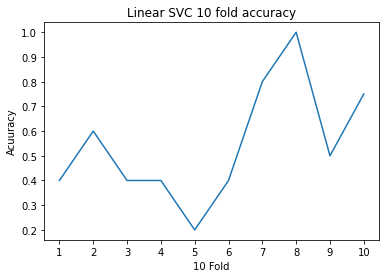

In [36]:
# Train 10dB dataframe i.e. train_sn10 = class 0 and 30 samples from remaining = class 1

data=data_function.getDifferentDataFrame(df,'train_sn10')
x_train, y_train, x_test, y_test=data_function.getTrainTestData(data,Number_of_Samples,7,7)
data_function.Report(x_train, y_train, x_test, y_test)

In [37]:
#done